1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# TensorFlow libraries for LSTM
""" from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense """


' from tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Dense '

2. Load and preprocess data

   step        Time Temperature Unnamed: 3 Unnamed: 4 Unnamed: 5 Power  \
0   NaN         NaN     Ambient         PV        PCM   nano-PCM    PV   
1   1.0  9:00:00 am       25.32      43.44      30.63      29.80  6.37   
2   2.0  9:00:30 am       25.27      43.96      30.83      29.97  6.31   
3   3.0  9:01:00 am       25.30      44.49      31.05      30.18  6.42   
4   4.0  9:01:30 am       24.65      44.57      31.25      30.38  6.43   

  Unnamed: 7 Unnamed: 8   Radiation  
0        PCM   nano-PCM         NaN  
1       6.59       7.65  648.227769  
2       6.62       7.68  649.467393  
3       6.65       7.72  651.004689  
4       6.68       7.75  653.393371  


KeyError: 'PV power'

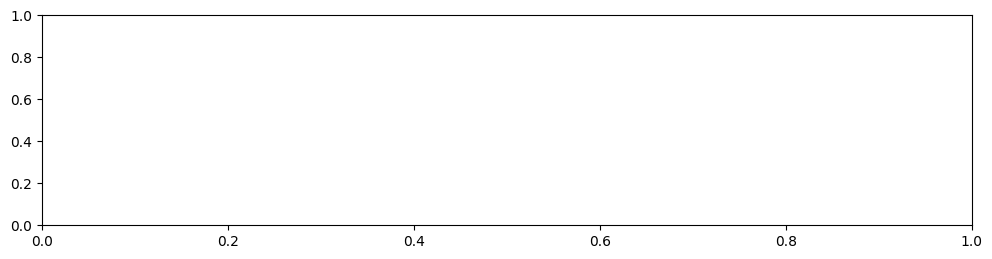

In [2]:
file_path = 'data.csv'
data = pd.read_csv(file_path)
print(data.head())


# Handle missing values (adjust based on specific patterns)
if any(data.isnull().sum()):  # Check for any missing values
    data.dropna(inplace=True)  # Simple case: drop all rows with missing values

# Handle duplicates (adjust based on desired behavior)
if data.duplicated().sum():  # Check for duplicate rows
    data.drop_duplicates(inplace=True)  # Simple case: remove all duplicates

# Explore data with visualizations
plt.figure(figsize=(12, 6))

# Time series plot for PV power
plt.subplot(211)
plt.plot(data["Time"], data["PV"])
plt.xlabel("Time")
plt.ylabel("PV")
plt.title("PV over Time")

# Scatter plot of PV power vs. temperature (add more as needed)
plt.subplot(212)
plt.scatter(data["PV temperature"], data["PV power"])
plt.xlabel("PV temperature")
plt.ylabel("PV")
plt.title("PV vs. Temperature")
plt.tight_layout()
plt.show()

# Feature normalization
scaler = StandardScaler()
data[["Ambient", "PV temperature", "Radiation"]] = scaler.fit_transform(data[["Ambient", "PV temperature", "Radiation"]])

# Separate features and target
X = data[["Ambient", "Radiation", "PV temperature"]]
y = data["PV"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Reshape data for LSTM (time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))